In [42]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
from shutil import copyfile

In [43]:
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = "faceMaskBinary--{}--{}.model".format(LR, '6conv-JPY2')
x=0

In [44]:
def Extract_Unmasked_data1():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/1/AFDB_face_dataset/AFDB_face_dataset'
    d_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/processedData/face'
    for folder in tqdm(os.listdir(f_dir)):
        path = os.path.join(f_dir,folder)
        y=0
        for img in os.listdir(path):
            if y>=8: # To make neural net more robust we took only 10 pictures from each person
                break
            if x>=4000: # extracted only 4000 unmasked imgaes because only 1400 masked images exits
                break
            if y%2 == 0:
                y+=1
                continue
            fpath = os.path.join(path,img)
            dpath = os.path.join(d_dir,str(x)+'.jpg')
            copyfile(fpath, dpath)
            x+=1
            y+=1

In [45]:
def Extract_Masked_data1():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/1/AFDB_masked_face_dataset/AFDB_masked_face_dataset'
    d_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/processedData/mask'
    for folder in tqdm(os.listdir(f_dir)):
        path = os.path.join(f_dir,folder)
        for img in os.listdir(path):
            fpath = os.path.join(path,img)
            dpath = os.path.join(d_dir,str(x)+'.jpg')
            copyfile(fpath, dpath)
            x+=1

In [46]:
def Extract_Unmasked_data2():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/2/without_mask'
    d_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/processedData/face'
    for img in tqdm(os.listdir(f_dir)):
        fpath = os.path.join(f_dir,img)
        dpath = os.path.join(d_dir,str(x)+'.png')
        copyfile(fpath, dpath)
        x+=1

In [47]:
def Extract_Masked_data2():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/2/with_mask'
    d_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/processedData/mask'
    for img in tqdm(os.listdir(f_dir)):
        fpath = os.path.join(f_dir,img)            
        dpath = os.path.join(d_dir,str(x)+'.png')
        copyfile(fpath, dpath)
        x+=1

In [48]:
def Extract_Unmasked_data3():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3/WithoutMask'
    d_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/processedData/face'
    for img in tqdm(os.listdir(f_dir)):
        fpath = os.path.join(f_dir,img)
        dpath = os.path.join(d_dir,str(x)+'.png')
        copyfile(fpath, dpath)
        x+=1

In [49]:
def Extract_Masked_data3():
    global x
    f_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Dataset/3/WithMask'
    d_dir = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/processedData/mask'
    for img in tqdm(os.listdir(f_dir)):
        fpath = os.path.join(f_dir,img)            
        dpath = os.path.join(d_dir,str(x)+'.png')
        copyfile(fpath, dpath)
        x+=1

In [50]:
Extract_Unmasked_data1()
Extract_Unmasked_data2()
Extract_Unmasked_data3()
Extract_Masked_data1()
Extract_Masked_data2()
Extract_Masked_data3()

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:38<00:00, 131.30it/s]


In [51]:
def predict(a):
    if a[0][0]>a[0][1]:
        print("Mask Detected")
    else:
        print('No Mask Detected')

In [54]:
data_face = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/processedData/face'
data_mask = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/processedData/mask'
data_npy = []
def process_data():
    for img in tqdm(os.listdir(data_face)):
        label = [0,1]
        path = os.path.join(data_face,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        img=img/255
        data_npy.append([np.array(img),np.array(label)])
    for img in tqdm(os.listdir(data_mask)):
        label = [1,0]
        path = os.path.join(data_mask,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        img=img/255
        data_npy.append([np.array(img),np.array(label)])
    shuffle(data_npy)
    #np.save("data.npy",data_npy)

In [55]:
process_data()

100%|█████████████████████████████████████████████████████████████████████████████| 6619/6619 [00:40<00:00, 162.52it/s]


In [56]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 3, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 3, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 3, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 3, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 3, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.5)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Scipy not supported!
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [57]:
train = data_npy[:-1000]
test = data_npy[-1000:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [69]:
model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1989  | total loss: 0.00485 | time: 38.577s
| Adam | epoch: 010 | loss: 0.00485 - acc: 0.9994 -- iter: 12672/12678
Training Step: 1990  | total loss: 0.00448 | time: 39.780s
| Adam | epoch: 010 | loss: 0.00448 - acc: 0.9995 | val_loss: 0.08548 - val_acc: 0.9840 -- iter: 12678/12678
--


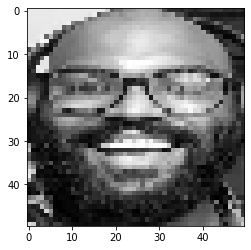

Mask Detected


array([[0.9850427, 0.0149573]], dtype=float32)

In [94]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/sandynomask.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
#print(image)
plt.imshow(image,cmap='gray')
plt.show()
predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1))

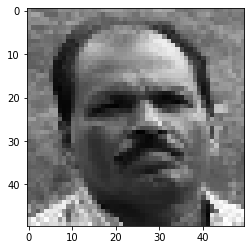

Mask Detected


array([[9.9941266e-01, 5.8733358e-04]], dtype=float32)

In [96]:
inputTest = 'C:/Users/HP PC/Desktop/Folder/DeepLearning/faceBinary/Capture5.jpg'
image = cv2.resize(cv2.imread(inputTest,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
image=image/255
plt.imshow(image,cmap='gray')
plt.show()
predict(model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)))
model.predict(np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1))